In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [14]:
import os
os.getcwd()

'C:\\Users\\a\\git\\Multi-Regional-Input-output-Analysis'

In [25]:
os.chdir('C:/Users/a/git/practical-statistics-for-data-scientists')
os.getcwd()


'C:\\Users\\a\\git\\practical-statistics-for-data-scientists'

In [31]:
AIRLINE_STATS_CSV = 'DATA/airline_stats.csv'
KC_TAX_CSV = 'DATA/kc_tax.csv.gz'
LC_LOANS_CSV = 'DATA/lc_loans.csv'
AIRPORT_DELAYS_CSV = 'DATA/dfw_airline.csv'
SP500_DATA_CSV = 'DATA/sp500_data.csv.gz'
SP500_SECTORS_CSV = 'DATA/ p500_sectors.csv'
STATE_CSV = 'DATA/state.csv'

In [33]:
state=pd.read_csv(STATE_CSV)
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [34]:
state['Population'].mean()

6162876.3

In [40]:
trim_mean(state['Population'],0.1)

4783697.125

In [41]:
state['Population'].median()

4436369.5

In [45]:
np.average(state['Murder.Rate'],weights=state['Population'])

4.445833981123393

In [49]:
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

In [50]:
state['Population'].var()

46898327373394.445

In [51]:
state['Population'].std()

6848235.347401142

In [53]:
state['Population'].quantile(0.75)-state['Population'].quantile(0.25)

4847308.0

In [54]:
robust.scale.mad(state['Population'])

3849876.1459979336

In [56]:
state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

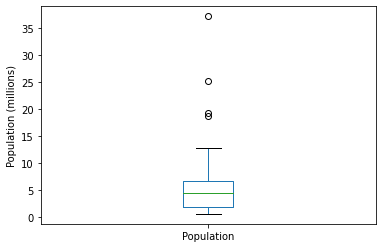

In [58]:
ax=(state['Population']/1000000).plot.box()
ax.set_ylabel('Population (millions)')

In [59]:
binnedPopulation=pd.cut(state['Population'],10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population( millions)')

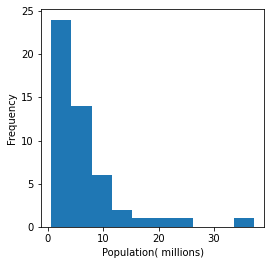

In [61]:
ax=(state['Population']/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population( millions)')

Text(0.5, 0, 'Murder Rate (per 100,000)')

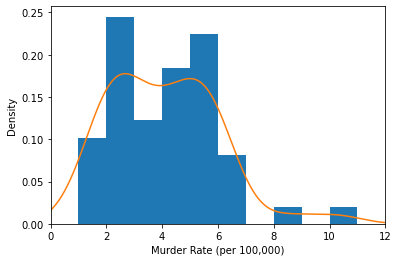

In [69]:
ax=state['Murder.Rate'].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
ax=state['Murder.Rate'].plot.density()
ax.set_xlabel('Murder Rate (per 100,000)')

In [70]:
dfw=pd.read_csv(AIRPORT_DELAYS_CSV)

In [72]:
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


Text(0, 0.5, 'Count')

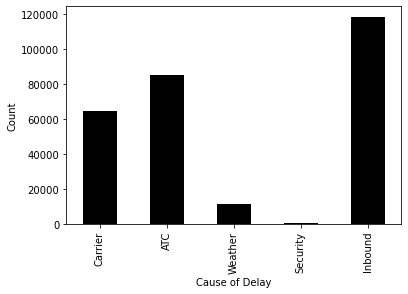

In [86]:
ax=dfw.transpose().plot.bar(legend=False, color='k')
ax.set_xlabel('Cause of Delay')
ax.set_ylabel('Count')

In [90]:
inf_m=pd.read_excel("C:/Users/a/Downloads/education and infant mortality.xlsx")

In [91]:
inf_m.corr()

,Male,Female,Infant Mortality Rate (2011)
Male,1.000000,0.882528,-0.504166
Female,0.882528,1.000000,-0.537379
Infant Mortality Rate (2011),-0.504166,-0.537379,1.000000
